# Heart Attack 

<br> 
<center><img src="https://scet.berkeley.edu/wp-content/uploads/eko-core2-768x517.png" width="500" height="300" /></center>
<br>

## 1.Introduction

**Heart Disease** refers to conditions that involve **narrowed or blocked blood vessels that can lead to a heart.**
The term **“heart disease”** is often used interchangeably with the term **“cardiovascular disease”.**

<br> 
<center><img src="https://www.pcrm.org/sites/default/files/2018-09/plant-based-diets-reduce-heart-disease-fb.jpeg" width="500" height="300" /></center>
<br>

## 2.Problem Statement

  According to the **Centers for Disease Control and Prevention Heart disease**is the number one cause of death for men,
  women, and people of most racial and ethnic groups in the United States. More than one person dies every minute and nearly
  **half a million die each year**in the United States from it, costing billions of dollars annually. 
  Therefore, the purpose of this story is to investigate different potential **supervised Machine Learning (ML)
  algorithms** for creating diagnostic heart disease models.



<br> 
<center><img src="https://th.bing.com/th/id/OIP.VmGEKdWvcCjBvac6aJy_hAHaFB?w=254&h=180&c=7&o=5&dpr=1.25&pid=1.7" width="500" height="300" /></center>
<br>

  **Dataset** In order to conduct this analysis, we use the publicly available Cleveland dataset for heart disease,
  which has over **300 unique instances with 76 total attributes.** From these **76 total attributes, only 14 of them are commonly 
  used for research to this date.**

## 2. Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 3. Importing and understanding the  dataset

In [2]:
heart=pd.read_csv('C:\\Users\\Lenovo\\Downloads\\heart.csv')

### 3.1. Printing first few columns

In [3]:
heart.head(30)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### 3.2. Shape of the dataset

In [5]:
heart.shape

(303, 14)

### 3.3. Understanding features of the dataset
**1.age:** 		    age

**2.sex:**			1: male, 0: female

**3.cp:**			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic

**4.trestbps:**	    resting blood pressure

**5.chol:**			serum cholestoral in mg/dl

**6.fbs:**			fasting blood sugar > 120 mg/dl

**7.restecg:**	    resting electrocardiographic results (values 0,1,2)

**8.thalach:**		maximum heart rate achieved

**9.exang:**		exercise induced angina

**10.oldpeak:**		oldpeak = ST depression induced by exercise relative to rest

**11.slope:**		the slope of the peak exercise ST segment

**12.ca:**			number of major vessels (0-3) colored by flourosopy

**13.thal:**		thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


### 3.4 Analysing the target variable

In [6]:
heart["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

 Clearly this is classification based problem since target class have 0 and 1 as discrete values.

## 4.  Data Wrangling

In [7]:
heart.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

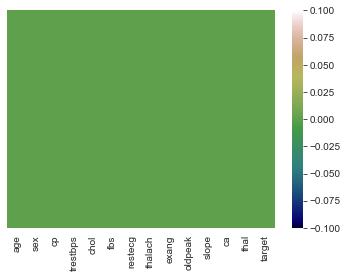

In [9]:
sns.set_style("whitegrid")
sns.heatmap(heart.isnull(),yticklabels=False,cmap="gist_earth")

## 5. EDA

### 5.1 The target column

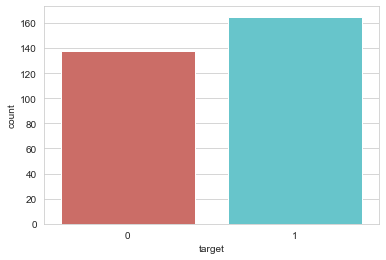

In [10]:
sns.set_style("whitegrid")
sns.countplot(data=heart, x='target', palette= 'hls')

### 5.2  Age column

In [11]:
heart["age"].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [12]:
heart["age"].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [13]:
y=heart["target"]

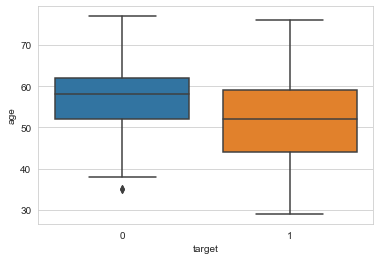

In [14]:
sns.boxplot(x= "target",y= "age", data= heart)

**IT IS OBSERVED THAT PEOPLE BETWEEN THE AGE OF 45 TO 60 TEND TO HAVE HEART DISEASE.**

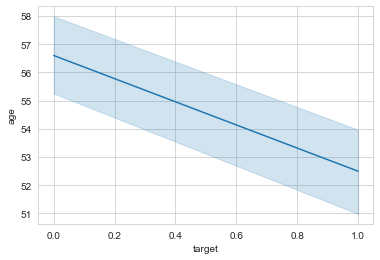

In [15]:
sns.lineplot(x= "target",y= "age", data= heart)

### 5.3 Sex column

In [16]:
heart["sex"].describe()

count    303.000000
mean       0.683168
std        0.466011
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

In [17]:
heart["sex"].unique()

array([1, 0], dtype=int64)

**WE GET TO SEE THAT SEX COLUMN HAS 2 UNIQUE VALUES I.E 0 AND 1**

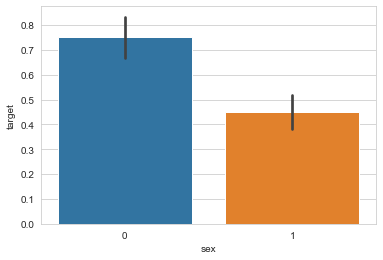

In [18]:
sns.barplot(heart["sex"],y)

**THE GRAPH SHOWS THAT FEMALES HAVE MORE TENDENCY TO HAVE HEART DISEASE THAN MALES.**

### 5.4 Chest pain column

In [19]:
heart["cp"].describe()

count    303.000000
mean       0.966997
std        1.032052
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: cp, dtype: float64

In [20]:
heart["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

 **The CP FEATURE HAS VALUES FROM 0 TO 3.**

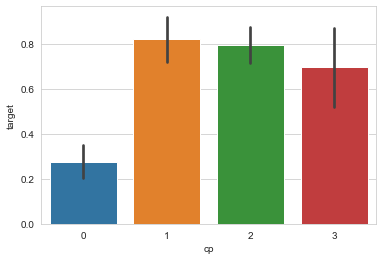

In [21]:
sns.barplot(heart["cp"],y)

**WE NOTICE THAT THE CHEST PAIN WITH 0 HAS TYPICAL ANGINA AND OTHERS HAVE SEVERE HEART PROBLEMS.**

**BECAUSE THE ONES WHO HAS TYPICAL ANGINA THEY TEND NOT TO HAVE HEART PROBLEMS.**

### 5.5 We can also plot histogram for the same.

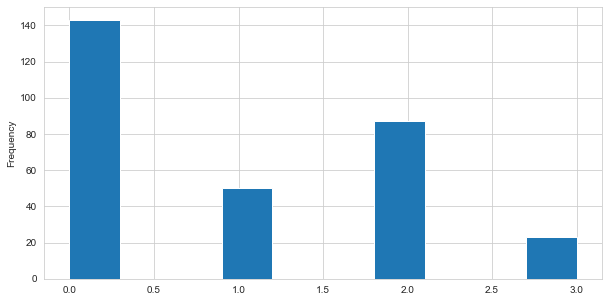

In [22]:
heart["cp"].plot.hist(figsize= (10,5))

### 5.6  FBS column

In [23]:
heart["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [24]:
heart["fbs"].unique()

array([1, 0], dtype=int64)

**AGAIN WE SEE THAT WE HAVE TWO UNIQUE VALUES I.E 0 AND 1.**

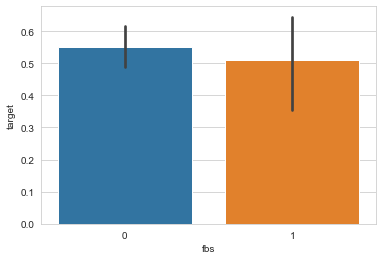

In [25]:
sns.barplot(heart["fbs"],y)

**NOT A BIG CHANGE.ALMOST SAME**

### 5.7 restecg column

In [26]:
heart["restecg"].describe()

count    303.000000
mean       0.528053
std        0.525860
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: restecg, dtype: float64

In [27]:
heart["restecg"].unique()

array([0, 1, 2], dtype=int64)

**IT ALSO CONTAINS 3 UNIQUE VALUES.**

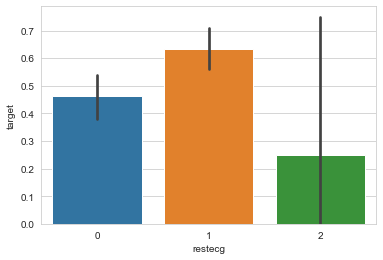

In [28]:
sns.barplot(heart["restecg"],y)

**WE SEE THAT PEOPLE WITH 0 AND 1 HAVE MORE LIKELY TO HAVE HEART DISEASE THEN 2.**

### 5.8 exang column

In [29]:
heart["exang"].describe()

count    303.000000
mean       0.326733
std        0.469794
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: exang, dtype: float64

In [30]:
heart["exang"].unique()

array([0, 1], dtype=int64)

**AGAIN 2 UNIQUE VALUES.**

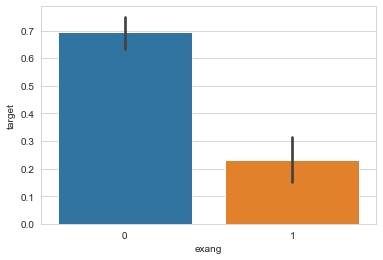

In [31]:
sns.barplot(heart["exang"],y)

**WE GET TO SEE THAT EXANG=1 I.E EXERCISED INDUCED ANGINA HAVE LESS TENDENCY TO HAVE HEART DISEASE.**

### 5.9 slope column

In [32]:
heart["slope"].describe()

count    303.000000
mean       1.399340
std        0.616226
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: slope, dtype: float64

In [33]:
heart["slope"].unique()

array([0, 2, 1], dtype=int64)

**AGAIN 3 UNIQUE VALUES.**



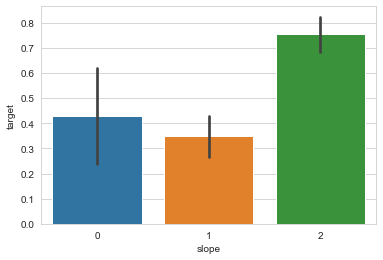

In [34]:
sns.barplot(heart["slope"],y)

### 5.10 ca column

In [35]:
heart["ca"].describe()

count    303.000000
mean       0.729373
std        1.022606
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: ca, dtype: float64

In [36]:
heart["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

**IT CONTAINS 4 UNIQUE VALUES.**

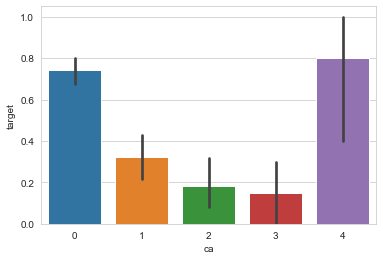

In [37]:
sns.barplot(heart["ca"],y)

**WE OBSERVE THAT MAJOR VESSEL 4 HAVE MORE LIKELY TO HAVE HEART DISEASE.**

### 5.11 thal column

In [38]:
heart["thal"].describe()

count    303.000000
mean       2.313531
std        0.612277
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: thal, dtype: float64

In [39]:
heart["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

**IT CONTAINS 4 UNIQUE VALUES.**

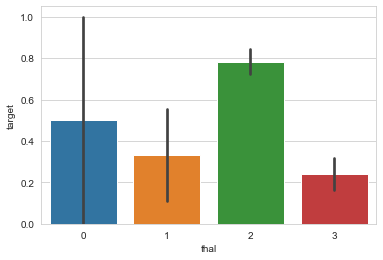

In [40]:
sns.barplot(heart["thal"],y)

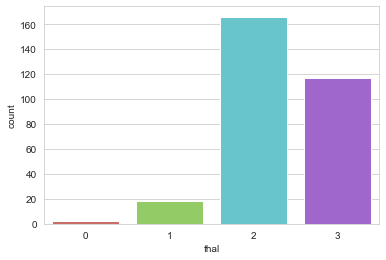

In [41]:
sns.set_style("whitegrid")
sns.countplot(data=heart, x='thal', palette= 'hls')

**IT SHOWS THE HIGHEST COUNT.**

### 5.12 PRINTING CORRELATION BETWEEN FEATURES.

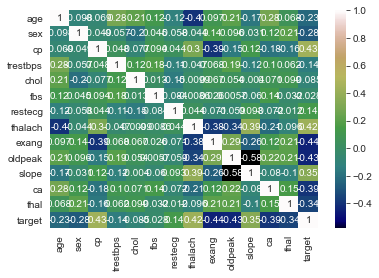

In [42]:
sns.heatmap(heart.corr(),cmap="gist_earth",annot=True)

### 5.13 trestbps column

In [43]:
heart["trestbps"].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [44]:
heart["trestbps"].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

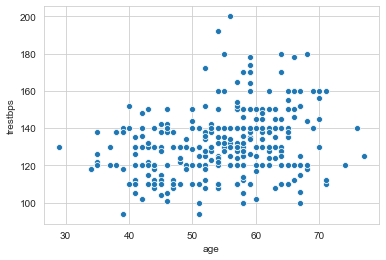

In [45]:
sns.scatterplot(y="trestbps",x="age",data=heart)

**THE BLOOD PRESSURE IS MORE BETWEEN 120 TO 140 FOR THE AGE OF 40 TO 70**

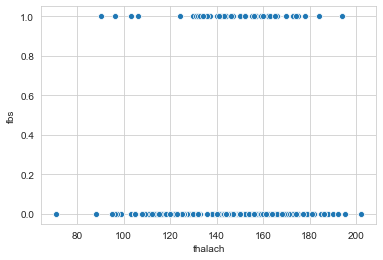

In [46]:
sns.scatterplot(y="fbs",x="thalach",data=heart)

### 5.14 chol column

In [47]:
heart["chol"].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

In [48]:
heart["chol"].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131], dtype=int64)

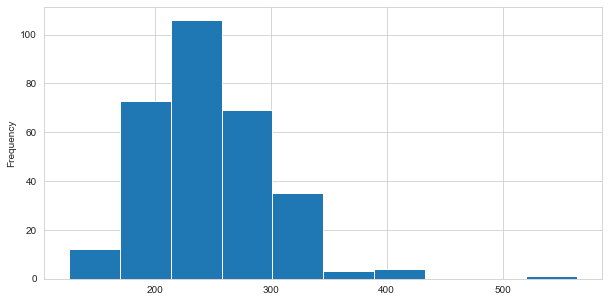

In [49]:
heart["chol"].plot.hist(figsize= (10,5))

**MORE NUMBER OF PROPLE HAVE CHOLESTROL OF AROUND 250**

### 5.15 thalach column

In [50]:
heart["thalach"].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In [51]:
heart["thalach"].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

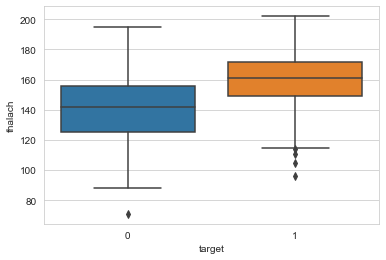

In [52]:
sns.boxplot(x= "target",y= "thalach", data= heart)

**IT IS OBSERVED THAT PEOPLE WITH MAXIMUM HEART RATE TEND TO HAVE HEART PROBLEM.**

## 6. MODEL

In [53]:
X= heart.drop("target", axis= 1)
y= heart["target"]

In [54]:
X.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [55]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [56]:
 from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 1)

### 6.1 SVM

In [58]:
from sklearn.svm import SVC

In [59]:
from sklearn.model_selection import GridSearchCV
parameters={'C': [0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.00001],
           'kernel':['rbf']}

In [60]:
grid=GridSearchCV(SVC(),parameters,refit=True,verbose=3)

In [61]:
##SVM=SVC(kernel='linear')

In [62]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.535, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.535, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.548, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.548, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.548, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.535, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.535, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.548, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.548, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    3.8s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 1e-05],
                         'kernel': ['rbf']},
             verbose=3)

In [63]:
prediction=grid.predict(X_test)

In [64]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73        41
           1       0.77      0.82      0.80        50

    accuracy                           0.77        91
   macro avg       0.77      0.76      0.77        91
weighted avg       0.77      0.77      0.77        91



In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
confusion_matrix(y_test, prediction)

array([[29, 12],
       [ 9, 41]], dtype=int64)

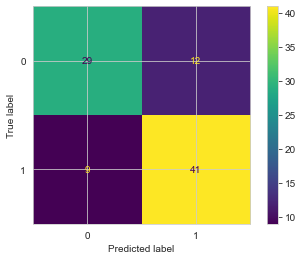

In [68]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid,X_test,y_test)
plt.show()

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy_score(y_test,prediction)

0.7692307692307693

### Accuracy of SVM is 76%

### 6.2 Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
reg=LogisticRegression()

In [73]:
reg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
Prediction=reg.predict(X_test)

In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(y_test,Prediction))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        41
           1       0.80      0.86      0.83        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
confusion_matrix(y_test,Prediction)

array([[30, 11],
       [ 7, 43]], dtype=int64)

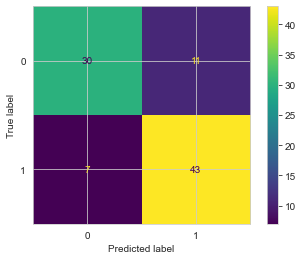

In [79]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(reg,X_test,y_test)
plt.show()

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
accuracy_score(y_test,Prediction)

0.8021978021978022

### Accuracy of Logistic Regression  is 80%

**Conculsion :** **Logistic Regression algorithm** worked better than **SVM**